# 🦋 Butterfly Classifier - Model Testing & Prediction
## Test Your Trained Model on Validation Set

**What This Notebook Does:**
1. ✅ Loads your trained model
2. ✅ Tests on validation images
3. ✅ Shows predictions with confidence
4. ✅ Generates detailed metrics
5. ✅ Creates confusion matrix
6. ✅ Shows sample predictions with images

**Requirements:**
- Your trained model (butterfly_model_best.h5)
- class_indices.json
- Butterfly dataset

---

## 📦 Step 1: Import Libraries

In [1]:
# Import required libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import json
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Set seeds
np.random.seed(42)
tf.random.set_seed(42)

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("=" * 70)
print("ENVIRONMENT CHECK")
print("=" * 70)
print(f"TensorFlow: {tf.__version__}")
print(f"GPU Available: {len(tf.config.list_physical_devices('GPU'))} device(s)")
print("=" * 70)
print("\n✅ Libraries loaded successfully!")

2026-01-07 07:37:17.198146: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1767771437.424520      47 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1767771437.490327      47 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

ENVIRONMENT CHECK
TensorFlow: 2.18.0
GPU Available: 2 device(s)

✅ Libraries loaded successfully!


## 📂 Step 2: Load Model & Data

**Make sure you've added:**
1. Your trained model as Kaggle dataset
2. Butterfly image dataset
3. class_indices.json

In [2]:
# Configure paths
MODEL_PATH = '/kaggle/input/butterfly-train-model/butterfly_model_best.h5'  # ← UPDATE THIS!
CLASS_INDICES_PATH = '/kaggle/input/butterfly-train-model/class_indices.json'  # ← UPDATE THIS!
DATASET_PATH = '/kaggle/input/butterfly-image-classification'
CSV_FILE = os.path.join(DATASET_PATH, 'Training_set.csv')
IMAGES_DIR = os.path.join(DATASET_PATH, 'train')

print("Checking files...")
print(f"Model exists: {os.path.exists(MODEL_PATH)}")
print(f"Class indices exists: {os.path.exists(CLASS_INDICES_PATH)}")
print(f"Dataset exists: {os.path.exists(CSV_FILE)}")

if not os.path.exists(MODEL_PATH):
    print("\n❌ Model not found!")
    print("Please add your model as a Kaggle dataset:")
    print("1. Go to Kaggle.com → Create Dataset")
    print("2. Upload: butterfly_model_best.h5 and class_indices.json")
    print("3. Add that dataset to this notebook")
    print("4. Update MODEL_PATH and CLASS_INDICES_PATH above")
    raise FileNotFoundError("Model not found")

Checking files...
Model exists: True
Class indices exists: True
Dataset exists: True


## 🤖 Step 3: Load Trained Model

In [3]:
print("Loading trained model...")

# Load model (ignore Keras 3.x warnings)
try:
    model = keras.models.load_model(MODEL_PATH, compile=False)
    print("✅ Model loaded successfully!")
except Exception as e:
    print(f"⚠️ Error loading model: {e}")
    print("Trying alternative loading method...")
    model = keras.models.load_model(MODEL_PATH)

# Compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print(f"\nModel Architecture: {model.layers[0].name}")
print(f"Total Parameters: {model.count_params():,}")
print(f"Input Shape: {model.input_shape}")
print(f"Output Shape: {model.output_shape}")

# Load class indices
with open(CLASS_INDICES_PATH, 'r') as f:
    class_indices = json.load(f)

# Create reverse mapping
idx_to_class = {v: k for k, v in class_indices.items()}
num_classes = len(class_indices)

print(f"\n✅ Loaded {num_classes} butterfly species")
print(f"First 5 species: {list(class_indices.keys())[:5]}")

Loading trained model...


I0000 00:00:1767771553.544412      47 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1767771553.545135      47 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


✅ Model loaded successfully!

Model Architecture: mobilenetv2_1.00_224
Total Parameters: 3,071,627
Input Shape: (None, 224, 224, 3)
Output Shape: (None, 75)

✅ Loaded 75 butterfly species
First 5 species: ['ADONIS', 'AFRICAN GIANT SWALLOWTAIL', 'AMERICAN SNOOT', 'AN 88', 'APPOLLO']


## 📊 Step 4: Load & Split Dataset

Using the **SAME split** as training (same random seed)

In [4]:
print("Loading dataset...")
df = pd.read_csv(CSV_FILE)
df['filepath'] = df['filename'].apply(lambda x: os.path.join(IMAGES_DIR, x))

# Verify files exist
existing = df['filepath'].apply(os.path.exists).sum()
print(f"Files found: {existing}/{len(df)}")

# Create SAME split as training (critical!)
print("\nCreating train/validation split...")
print("⚠️ Using SAME random seed (42) as training")

train_df, val_df = train_test_split(
    df,
    test_size=0.2,
    stratify=df['label'],
    random_state=42  # MUST be same as training!
)

print(f"\n✅ Split created:")
print(f"Training: {len(train_df)} images (not used here)")
print(f"Validation: {len(val_df)} images (for testing)")
print(f"\n⚠️ Testing ONLY on validation set (unseen during training)")

Loading dataset...
Files found: 6499/6499

Creating train/validation split...
⚠️ Using SAME random seed (42) as training

✅ Split created:
Training: 5199 images (not used here)
Validation: 1300 images (for testing)

⚠️ Testing ONLY on validation set (unseen during training)


## 🎯 Step 5: Make Predictions on Validation Set

In [5]:
def preprocess_image(image_path, target_size=(224, 224)):
    """Load and preprocess image for prediction"""
    img = Image.open(image_path).convert('RGB')
    img = img.resize(target_size)
    img_array = np.array(img) / 255.0
    return img_array

print("Making predictions on validation set...")
print(f"Total images to predict: {len(val_df)}")
print("This may take a few minutes...\n")

# Prepare batch prediction
images = []
true_labels = []

for idx, row in val_df.iterrows():
    try:
        img = preprocess_image(row['filepath'])
        images.append(img)
        true_labels.append(class_indices[row['label']])
    except Exception as e:
        print(f"Error loading {row['filepath']}: {e}")
        continue

# Convert to numpy array
images = np.array(images)
true_labels = np.array(true_labels)

print(f"✅ Loaded {len(images)} images for prediction")

# Make predictions
print("\nRunning model predictions...")
predictions = model.predict(images, batch_size=32, verbose=1)

# Get predicted classes and confidence
predicted_classes = np.argmax(predictions, axis=1)
confidence_scores = np.max(predictions, axis=1)

print("\n✅ Predictions complete!")

Making predictions on validation set...
Total images to predict: 1300
This may take a few minutes...

✅ Loaded 1300 images for prediction

Running model predictions...


I0000 00:00:1767771623.905133     117 service.cc:148] XLA service 0x7ba144141040 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1767771623.906108     117 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1767771623.906128     117 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1767771624.419204     117 cuda_dnn.cc:529] Loaded cuDNN version 90300


 5/41 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step

I0000 00:00:1767771628.354146     117 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


41/41 ━━━━━━━━━━━━━━━━━━━━ 12s 135ms/step

✅ Predictions complete!


## 📈 Step 6: Calculate Metrics

In [6]:
# Calculate metrics
accuracy = accuracy_score(true_labels, predicted_classes)
f1 = f1_score(true_labels, predicted_classes, average='weighted')

print("=" * 70)
print("MODEL PERFORMANCE ON VALIDATION SET")
print("=" * 70)
print(f"\nTotal Images Tested: {len(images)}")
print(f"Number of Species: {num_classes}")
print(f"\n🎯 Overall Metrics:")
print(f"   Accuracy: {accuracy*100:.2f}%")
print(f"   F1-Score: {f1:.4f}")
print(f"   Average Confidence: {confidence_scores.mean()*100:.2f}%")
print(f"\n✅ Correct Predictions: {(predicted_classes == true_labels).sum()}")
print(f"❌ Incorrect Predictions: {(predicted_classes != true_labels).sum()}")
print("=" * 70)

MODEL PERFORMANCE ON VALIDATION SET

Total Images Tested: 1300
Number of Species: 75

🎯 Overall Metrics:
   Accuracy: 88.46%
   F1-Score: 0.8829
   Average Confidence: 89.36%

✅ Correct Predictions: 1150
❌ Incorrect Predictions: 150


## 📊 Step 7: Detailed Classification Report

In [7]:
# Generate classification report
print("\nGenerating detailed classification report...\n")

target_names = [idx_to_class[i] for i in range(num_classes)]
report = classification_report(
    true_labels,
    predicted_classes,
    target_names=target_names,
    output_dict=True,
    zero_division=0
)

# Convert to DataFrame for better display
report_df = pd.DataFrame(report).transpose()
report_df = report_df.round(3)

# Show summary statistics
print("=" * 70)
print("PERFORMANCE BY SPECIES (Top 10 Best)")
print("=" * 70)
top_species = report_df.iloc[:-3].sort_values('f1-score', ascending=False).head(10)
print(top_species[['precision', 'recall', 'f1-score', 'support']])

print("\n" + "=" * 70)
print("PERFORMANCE BY SPECIES (Bottom 10 - Need Improvement)")
print("=" * 70)
bottom_species = report_df.iloc[:-3].sort_values('f1-score', ascending=False).tail(10)
print(bottom_species[['precision', 'recall', 'f1-score', 'support']])

print("\n" + "=" * 70)
print("OVERALL STATISTICS")
print("=" * 70)
print(report_df.loc[['accuracy', 'macro avg', 'weighted avg']])

# Save report
report_df.to_csv('classification_report.csv')
print("\n✅ Saved: classification_report.csv")


Generating detailed classification report...

PERFORMANCE BY SPECIES (Top 10 Best)
                 precision  recall  f1-score  support
CHESTNUT             1.000   1.000     1.000     17.0
AN 88                1.000   1.000     1.000     17.0
BLUE MORPHO          1.000   1.000     1.000     15.0
PAPER KITE           1.000   1.000     1.000     18.0
SCARCE SWALLOW       1.000   1.000     1.000     20.0
ATALA                0.952   1.000     0.976     20.0
ULYSES               1.000   0.941     0.970     17.0
PEACOCK              1.000   0.941     0.970     17.0
ELBOWED PIERROT      1.000   0.938     0.968     16.0
MALACHITE            0.938   1.000     0.968     15.0

PERFORMANCE BY SPECIES (Bottom 10 - Need Improvement)
                      precision  recall  f1-score  support
CLEOPATRA                 0.762   0.842     0.800     19.0
SOUTHERN DOGFACE          0.765   0.765     0.765     17.0
LARGE MARBLE              0.667   0.875     0.757     16.0
PURPLISH COPPER           0.722

## 🎨 Step 8: Confusion Matrix

Creating confusion matrix...


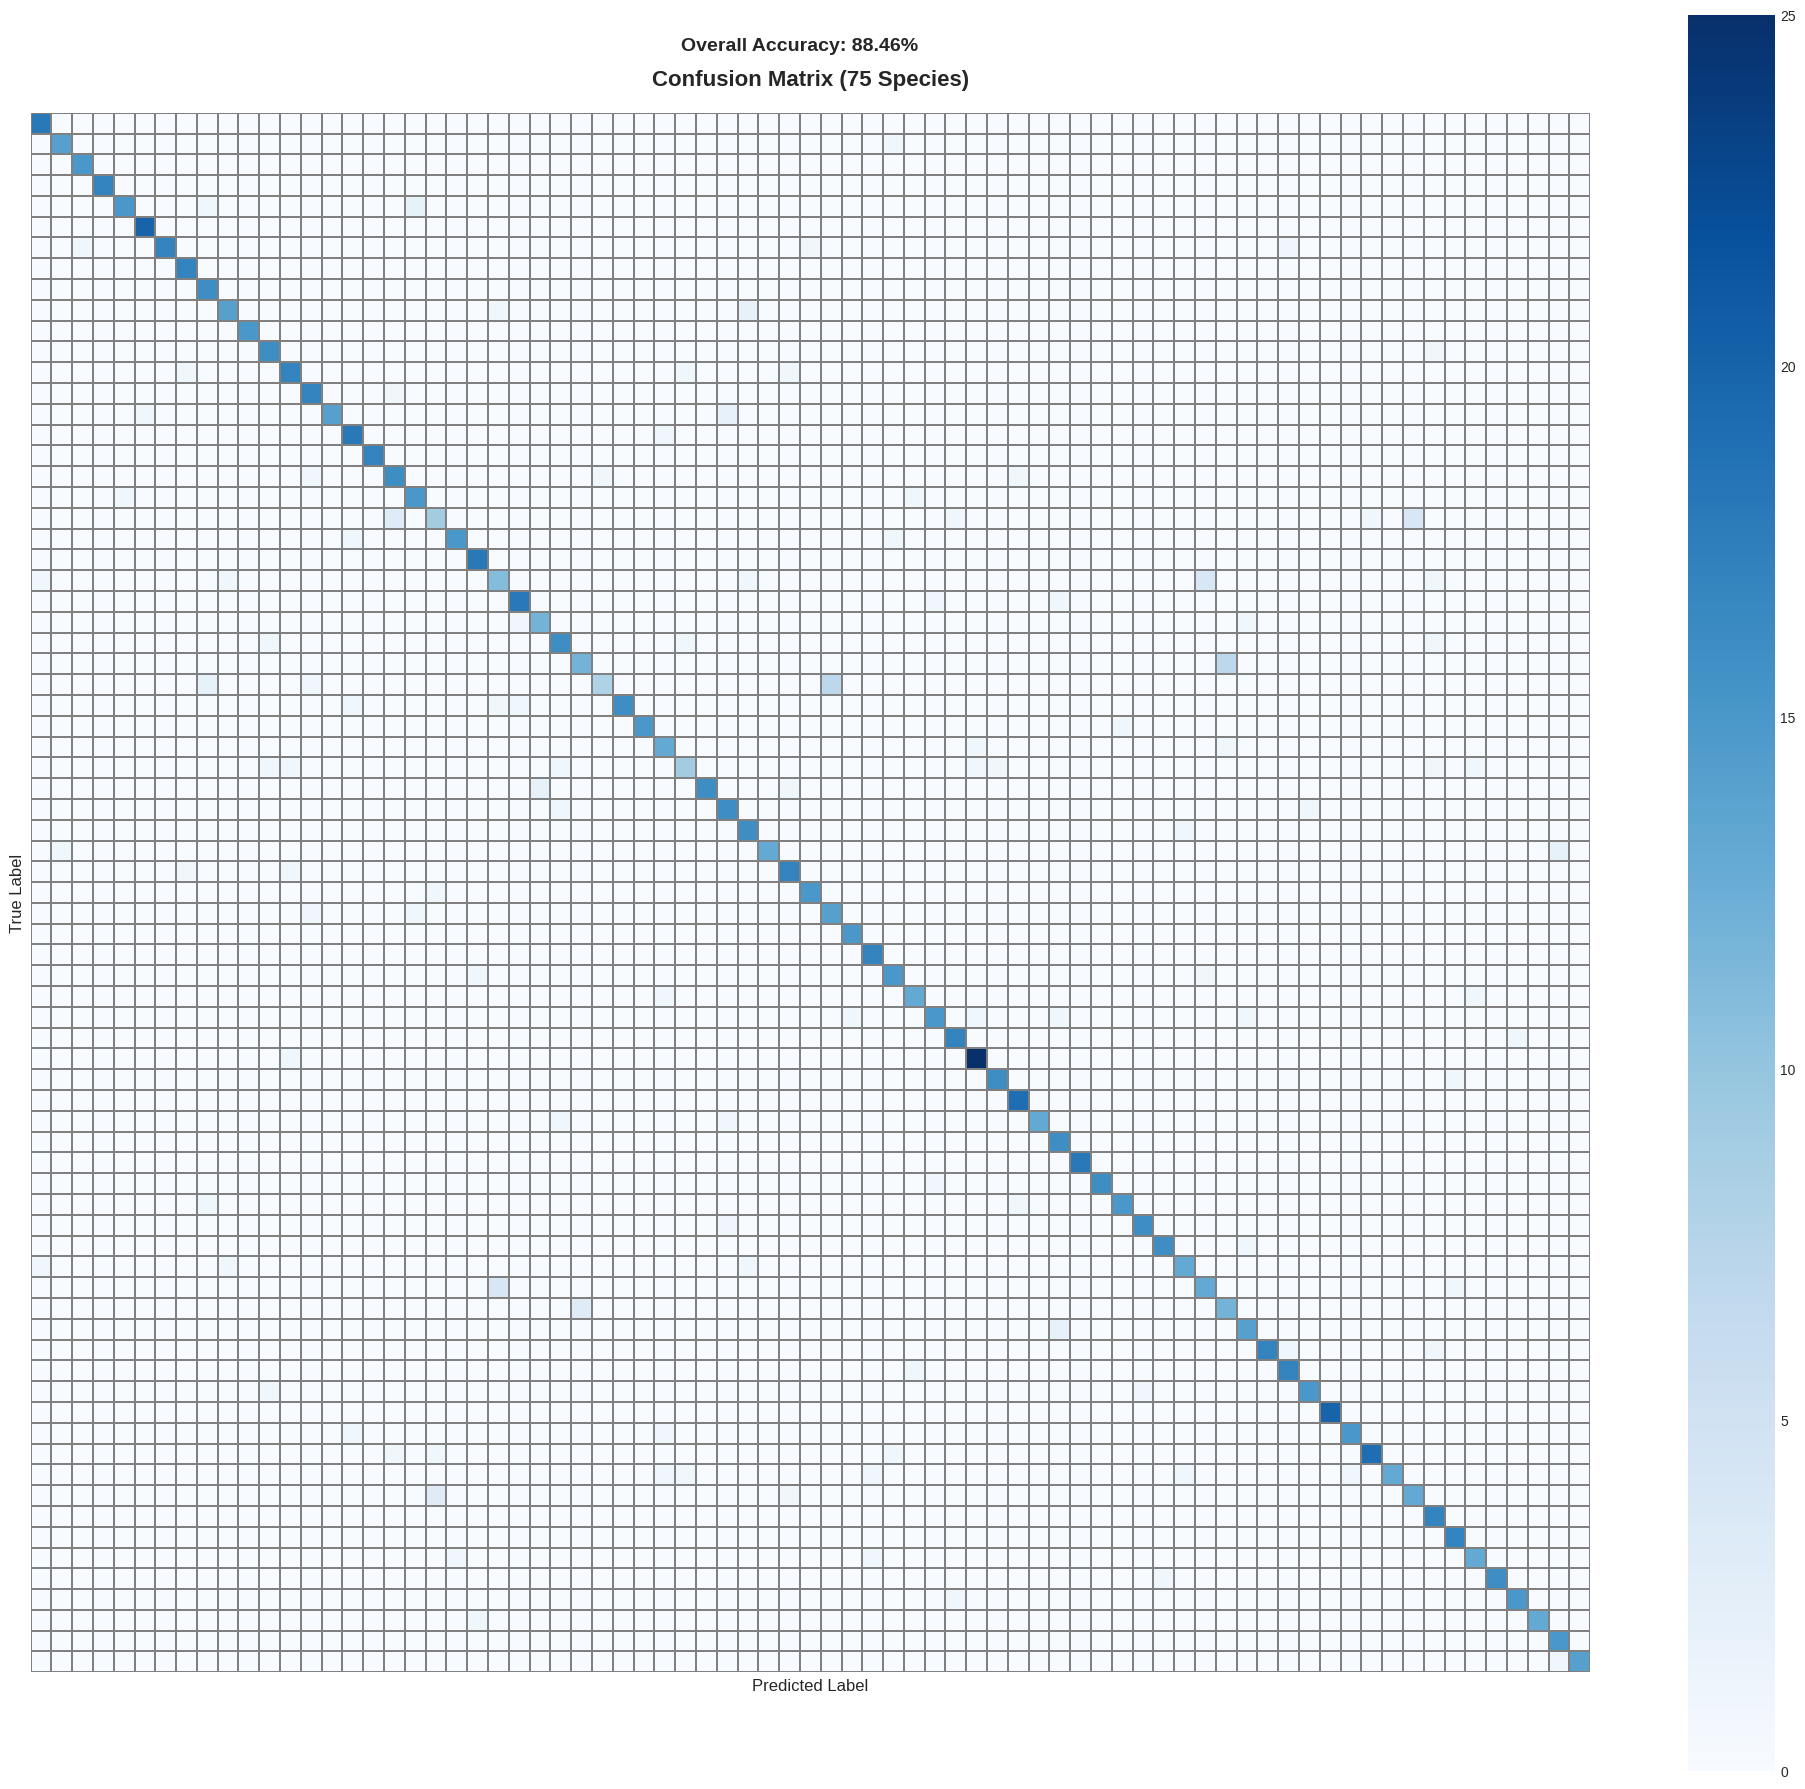

✅ Saved: confusion_matrix.png

Per-class accuracy range: 44.4% - 100.0%
Mean per-class accuracy: 88.6%


In [8]:
# Generate confusion matrix
print("Creating confusion matrix...")
cm = confusion_matrix(true_labels, predicted_classes)

# Plot confusion matrix (simplified version due to 75 classes)
plt.figure(figsize=(20, 18))
sns.heatmap(cm, cmap='Blues', cbar=True, square=True, 
            xticklabels=False, yticklabels=False,
            linewidths=0.1, linecolor='gray')
plt.title('Confusion Matrix (75 Species)', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.text(num_classes//2, -3, 
         f'Overall Accuracy: {accuracy*100:.2f}%',
         ha='center', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Saved: confusion_matrix.png")

# Calculate per-class accuracy
per_class_accuracy = cm.diagonal() / cm.sum(axis=1)
print(f"\nPer-class accuracy range: {per_class_accuracy.min()*100:.1f}% - {per_class_accuracy.max()*100:.1f}%")
print(f"Mean per-class accuracy: {per_class_accuracy.mean()*100:.1f}%")

## 🖼️ Step 9: Visualize Sample Predictions

Showing sample CORRECT predictions...



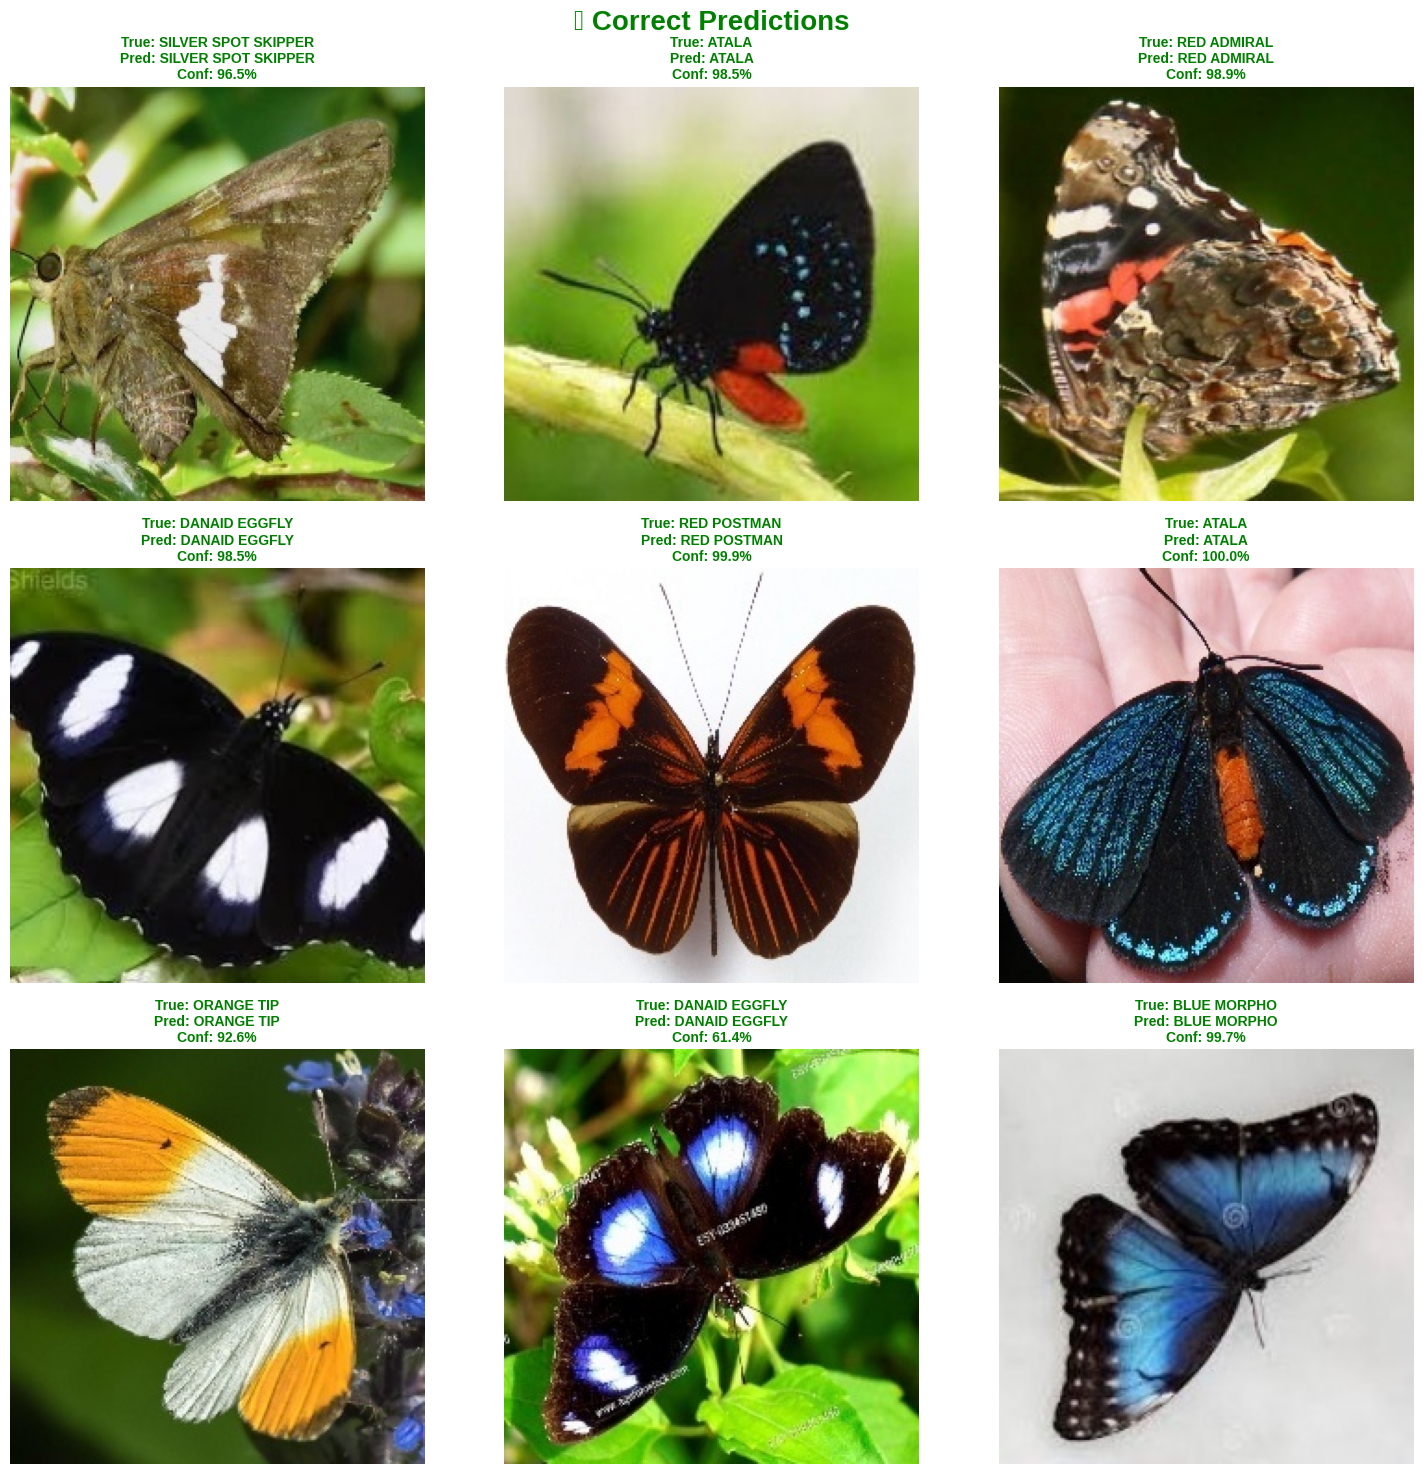

✅ Saved: correct_predictions.png


In [9]:
# Show correct predictions
print("Showing sample CORRECT predictions...\n")

correct_indices = np.where(predicted_classes == true_labels)[0]
sample_correct = np.random.choice(correct_indices, min(9, len(correct_indices)), replace=False)

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('✅ Correct Predictions', fontsize=20, fontweight='bold', color='green')

for idx, ax in enumerate(axes.flat):
    if idx < len(sample_correct):
        i = sample_correct[idx]
        ax.imshow(images[i])
        true_name = idx_to_class[true_labels[i]]
        pred_name = idx_to_class[predicted_classes[i]]
        conf = confidence_scores[i]
        ax.set_title(f'True: {true_name}\nPred: {pred_name}\nConf: {conf*100:.1f}%',
                     fontsize=10, color='green', fontweight='bold')
        ax.axis('off')

plt.tight_layout()
plt.savefig('correct_predictions.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Saved: correct_predictions.png")


Showing sample INCORRECT predictions...



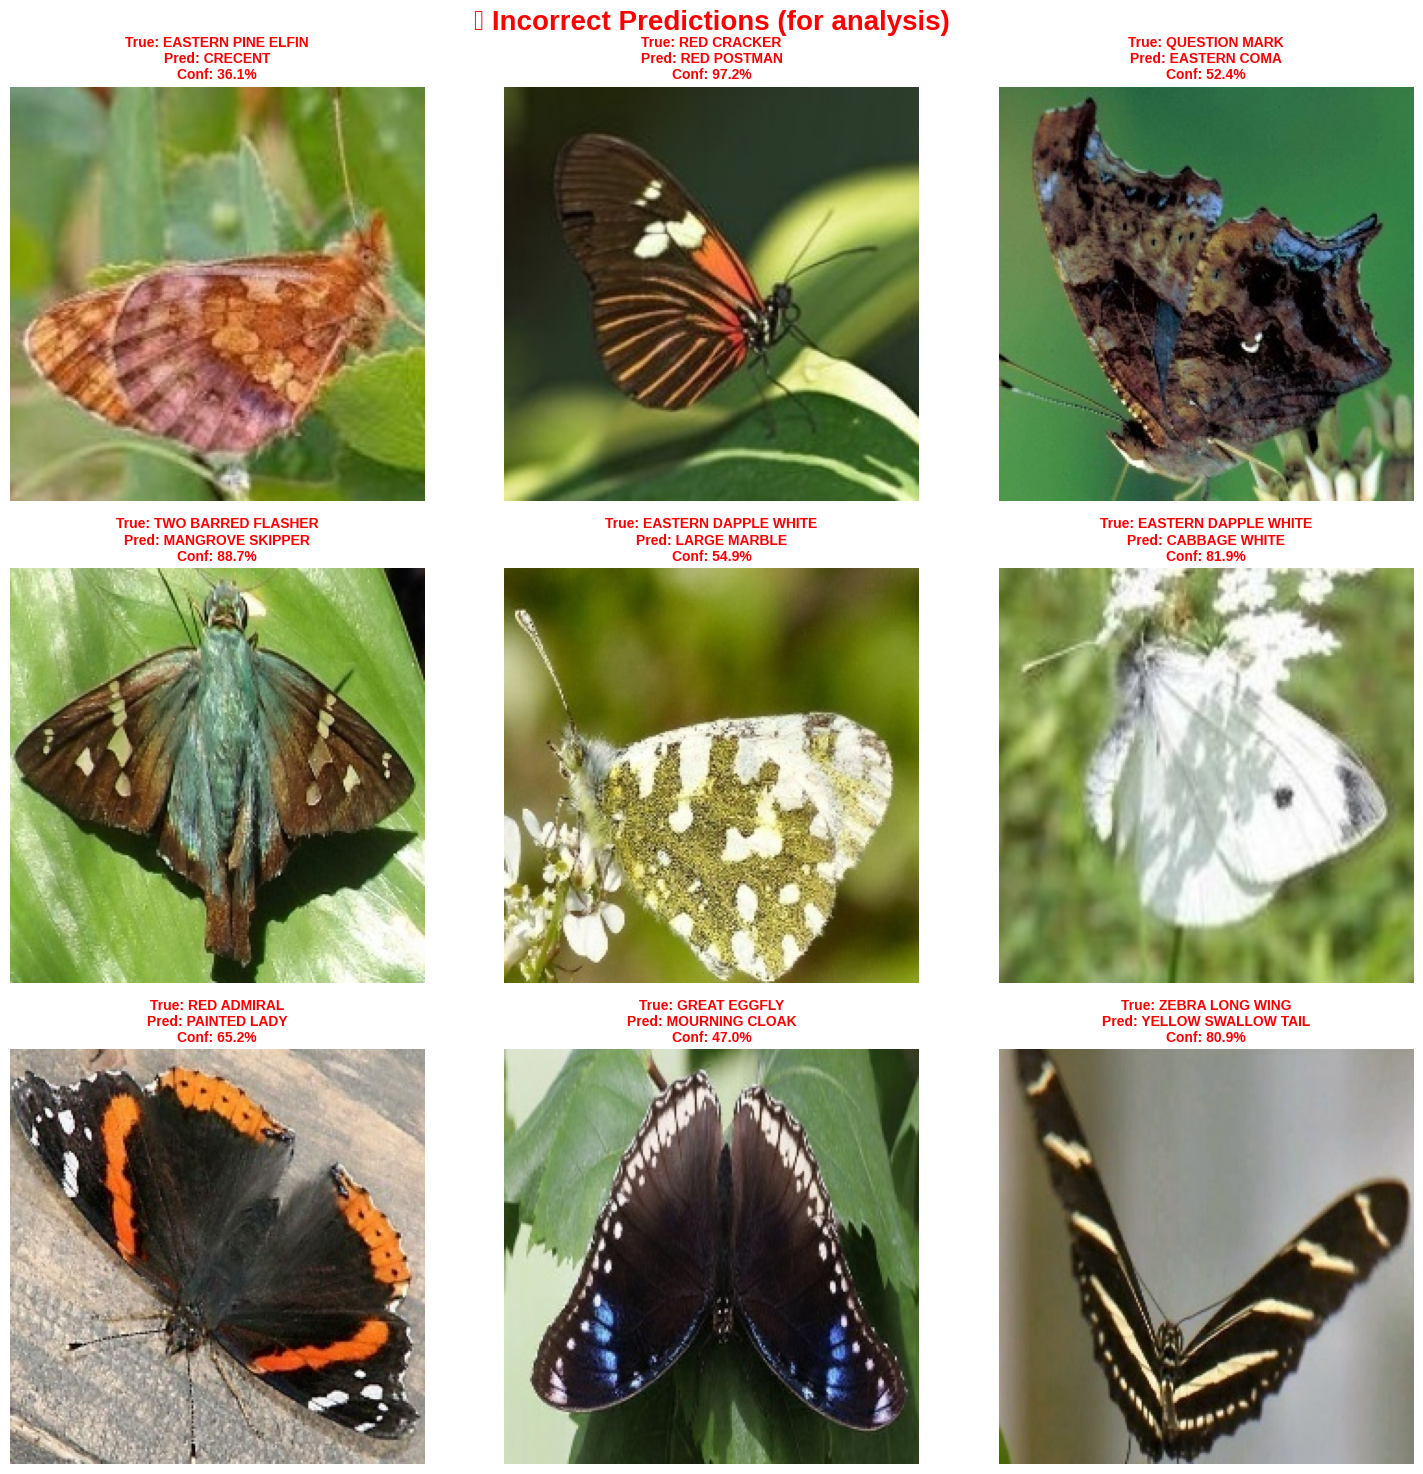

✅ Saved: incorrect_predictions.png


In [10]:
# Show incorrect predictions
print("\nShowing sample INCORRECT predictions...\n")

incorrect_indices = np.where(predicted_classes != true_labels)[0]

if len(incorrect_indices) > 0:
    sample_incorrect = np.random.choice(incorrect_indices, min(9, len(incorrect_indices)), replace=False)
    
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    fig.suptitle('❌ Incorrect Predictions (for analysis)', fontsize=20, fontweight='bold', color='red')
    
    for idx, ax in enumerate(axes.flat):
        if idx < len(sample_incorrect):
            i = sample_incorrect[idx]
            ax.imshow(images[i])
            true_name = idx_to_class[true_labels[i]]
            pred_name = idx_to_class[predicted_classes[i]]
            conf = confidence_scores[i]
            ax.set_title(f'True: {true_name}\nPred: {pred_name}\nConf: {conf*100:.1f}%',
                         fontsize=10, color='red', fontweight='bold')
            ax.axis('off')
    
    plt.tight_layout()
    plt.savefig('incorrect_predictions.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print("✅ Saved: incorrect_predictions.png")
else:
    print("🎉 Perfect predictions! No errors to show!")

## 📊 Step 10: Confidence Analysis

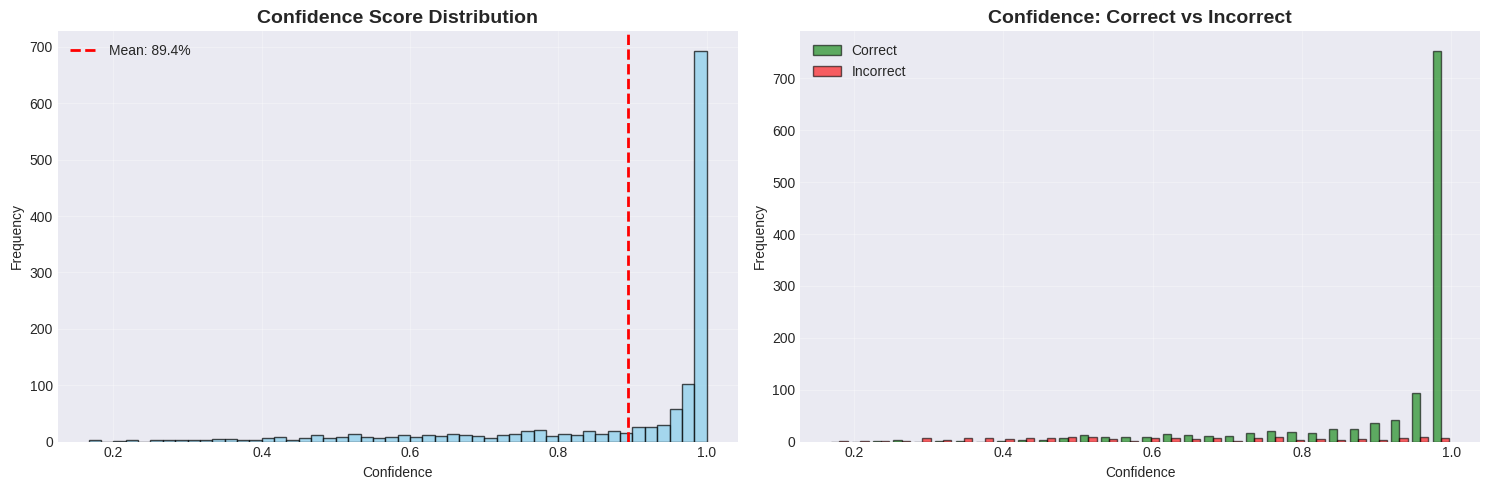

✅ Saved: confidence_analysis.png

Confidence Statistics:
  Correct predictions: 92.91% avg confidence
  Incorrect predictions: 62.11% avg confidence
  High confidence (>90%): 935 predictions (71.9%)


In [11]:
# Analyze confidence scores
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Overall confidence distribution
ax1 = axes[0]
ax1.hist(confidence_scores, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
ax1.axvline(confidence_scores.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {confidence_scores.mean()*100:.1f}%')
ax1.set_title('Confidence Score Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('Confidence')
ax1.set_ylabel('Frequency')
ax1.legend()
ax1.grid(alpha=0.3)

# Confidence by correctness
ax2 = axes[1]
correct_conf = confidence_scores[predicted_classes == true_labels]
incorrect_conf = confidence_scores[predicted_classes != true_labels]

ax2.hist([correct_conf, incorrect_conf], bins=30, 
         label=['Correct', 'Incorrect'],
         color=['green', 'red'], alpha=0.6, edgecolor='black')
ax2.set_title('Confidence: Correct vs Incorrect', fontsize=14, fontweight='bold')
ax2.set_xlabel('Confidence')
ax2.set_ylabel('Frequency')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('confidence_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Saved: confidence_analysis.png")

print(f"\nConfidence Statistics:")
print(f"  Correct predictions: {correct_conf.mean()*100:.2f}% avg confidence")
if len(incorrect_conf) > 0:
    print(f"  Incorrect predictions: {incorrect_conf.mean()*100:.2f}% avg confidence")
print(f"  High confidence (>90%): {(confidence_scores > 0.9).sum()} predictions ({(confidence_scores > 0.9).sum()/len(confidence_scores)*100:.1f}%)")

## 💾 Step 11: Save Results

In [12]:
# Create results DataFrame
results_df = pd.DataFrame({
    'image_path': val_df['filepath'].values[:len(predicted_classes)],
    'true_label': [idx_to_class[i] for i in true_labels],
    'predicted_label': [idx_to_class[i] for i in predicted_classes],
    'confidence': confidence_scores,
    'correct': predicted_classes == true_labels
})

# Save to CSV
results_df.to_csv('prediction_results.csv', index=False)
print("✅ Saved: prediction_results.csv")

# Save summary
summary = {
    'total_images': len(images),
    'num_classes': num_classes,
    'accuracy': float(accuracy),
    'f1_score': float(f1),
    'average_confidence': float(confidence_scores.mean()),
    'correct_predictions': int((predicted_classes == true_labels).sum()),
    'incorrect_predictions': int((predicted_classes != true_labels).sum())
}

with open('test_summary.json', 'w') as f:
    json.dump(summary, f, indent=2)
print("✅ Saved: test_summary.json")

print("\n" + "=" * 70)
print("ALL RESULTS SAVED!")
print("=" * 70)
print("\nFiles created:")
print("1. classification_report.csv - Detailed metrics per species")
print("2. confusion_matrix.png - Visual confusion matrix")
print("3. correct_predictions.png - Sample correct predictions")
print("4. incorrect_predictions.png - Sample errors (for analysis)")
print("5. confidence_analysis.png - Confidence distribution")
print("6. prediction_results.csv - All predictions with confidence")
print("7. test_summary.json - Summary statistics")
print("="*70)

✅ Saved: prediction_results.csv
✅ Saved: test_summary.json

ALL RESULTS SAVED!

Files created:
1. classification_report.csv - Detailed metrics per species
2. confusion_matrix.png - Visual confusion matrix
3. correct_predictions.png - Sample correct predictions
4. incorrect_predictions.png - Sample errors (for analysis)
5. confidence_analysis.png - Confidence distribution
6. prediction_results.csv - All predictions with confidence
7. test_summary.json - Summary statistics


## 📊 Step 12: Final Summary

In [13]:
print("\n" + "=" * 70)
print("🎉 TESTING COMPLETE - FINAL SUMMARY")
print("=" * 70)

print(f"\n📊 Dataset:")
print(f"   Total Validation Images: {len(images)}")
print(f"   Number of Species: {num_classes}")

print(f"\n🎯 Performance:")
print(f"   Accuracy: {accuracy*100:.2f}%")
print(f"   F1-Score: {f1:.4f}")
print(f"   Correct: {(predicted_classes == true_labels).sum()} images")
print(f"   Incorrect: {(predicted_classes != true_labels).sum()} images")

print(f"\n💪 Confidence:")
print(f"   Average: {confidence_scores.mean()*100:.2f}%")
print(f"   High confidence (>90%): {(confidence_scores > 0.9).sum()} predictions")
print(f"   Low confidence (<50%): {(confidence_scores < 0.5).sum()} predictions")

print(f"\n📁 Files Saved: 7 files ready to download")

print("\n" + "=" * 70)
print("✨ Your model has been thoroughly tested!")
print("📥 Download all files from the Output tab")
print("🚀 Ready to deploy with Streamlit!")
print("=" * 70)


🎉 TESTING COMPLETE - FINAL SUMMARY

📊 Dataset:
   Total Validation Images: 1300
   Number of Species: 75

🎯 Performance:
   Accuracy: 88.46%
   F1-Score: 0.8829
   Correct: 1150 images
   Incorrect: 150 images

💪 Confidence:
   Average: 89.36%
   High confidence (>90%): 935 predictions
   Low confidence (<50%): 74 predictions

📁 Files Saved: 7 files ready to download

✨ Your model has been thoroughly tested!
📥 Download all files from the Output tab
🚀 Ready to deploy with Streamlit!


---

## 🎉 Testing Complete!

### ✅ What You Have:

1. **classification_report.csv** - Performance per species
2. **confusion_matrix.png** - Visual matrix (75x75)
3. **correct_predictions.png** - Sample successes
4. **incorrect_predictions.png** - Errors for analysis
5. **confidence_analysis.png** - Confidence distributions
6. **prediction_results.csv** - All predictions with details
7. **test_summary.json** - Overall statistics

### 📊 What This Tells You:

- **Accuracy** - Overall correctness
- **F1-Score** - Balanced performance metric
- **Confidence** - Model's certainty
- **Per-species** - Which butterflies are easiest/hardest
- **Confusion patterns** - Common misclassifications

### 🚀 Next Steps:

1. **Download all 7 files** from Output tab
2. **Analyze results** - Which species need more training data?
3. **Use for documentation** - Include charts in your report
4. **Deploy with Streamlit** - Now you know it works!



---